In [4]:
import cv2
import numpy as np
from scipy import fftpack
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [2]:
def homomorphic_filter(img, sigma, alpha, low_h, low_l, high_h, high_l):
    gray_img = img.astype('float') / 255.0
    log_img = np.log(gray_img + 1.0)            #因为图像像素值从0开始
    rows, cols = gray_img.shape
    M, N = np.meshgrid(np.arange(cols), np.arange(rows))
    centerX = int(cols / 2)
    centerY = int(rows / 2)
    gaussian = np.exp(-((M - centerX) ** 2 + (N - centerY) ** 2) / (2 * sigma ** 2))
    filtered_log = gaussian * fftpack.fft2(log_img)
    filtered = np.real(fftpack.ifft2(np.exp(fftpack.ifftshift(filtered_log))))
    highpass = alpha * (gray_img - filtered) + filtered
    filtered_image = np.zeros(gray_img.shape)
    filtered_image = (high_h - high_l) * (highpass - np.min(highpass)) / (np.max(highpass) - np.min(highpass)) + high_l
    filtered_image = filtered_image.clip(0, 1)
    filtered_image = (filtered_image * 255).astype('uint8')
    return filtered_image

In [30]:
img = cv2.imread('./HF.jpg', 0)
filtered = homomorphic_filter(img, sigma=5, alpha=1.2, low_h=1.0, low_l=0.5, high_h=3.0, high_l=0.0)

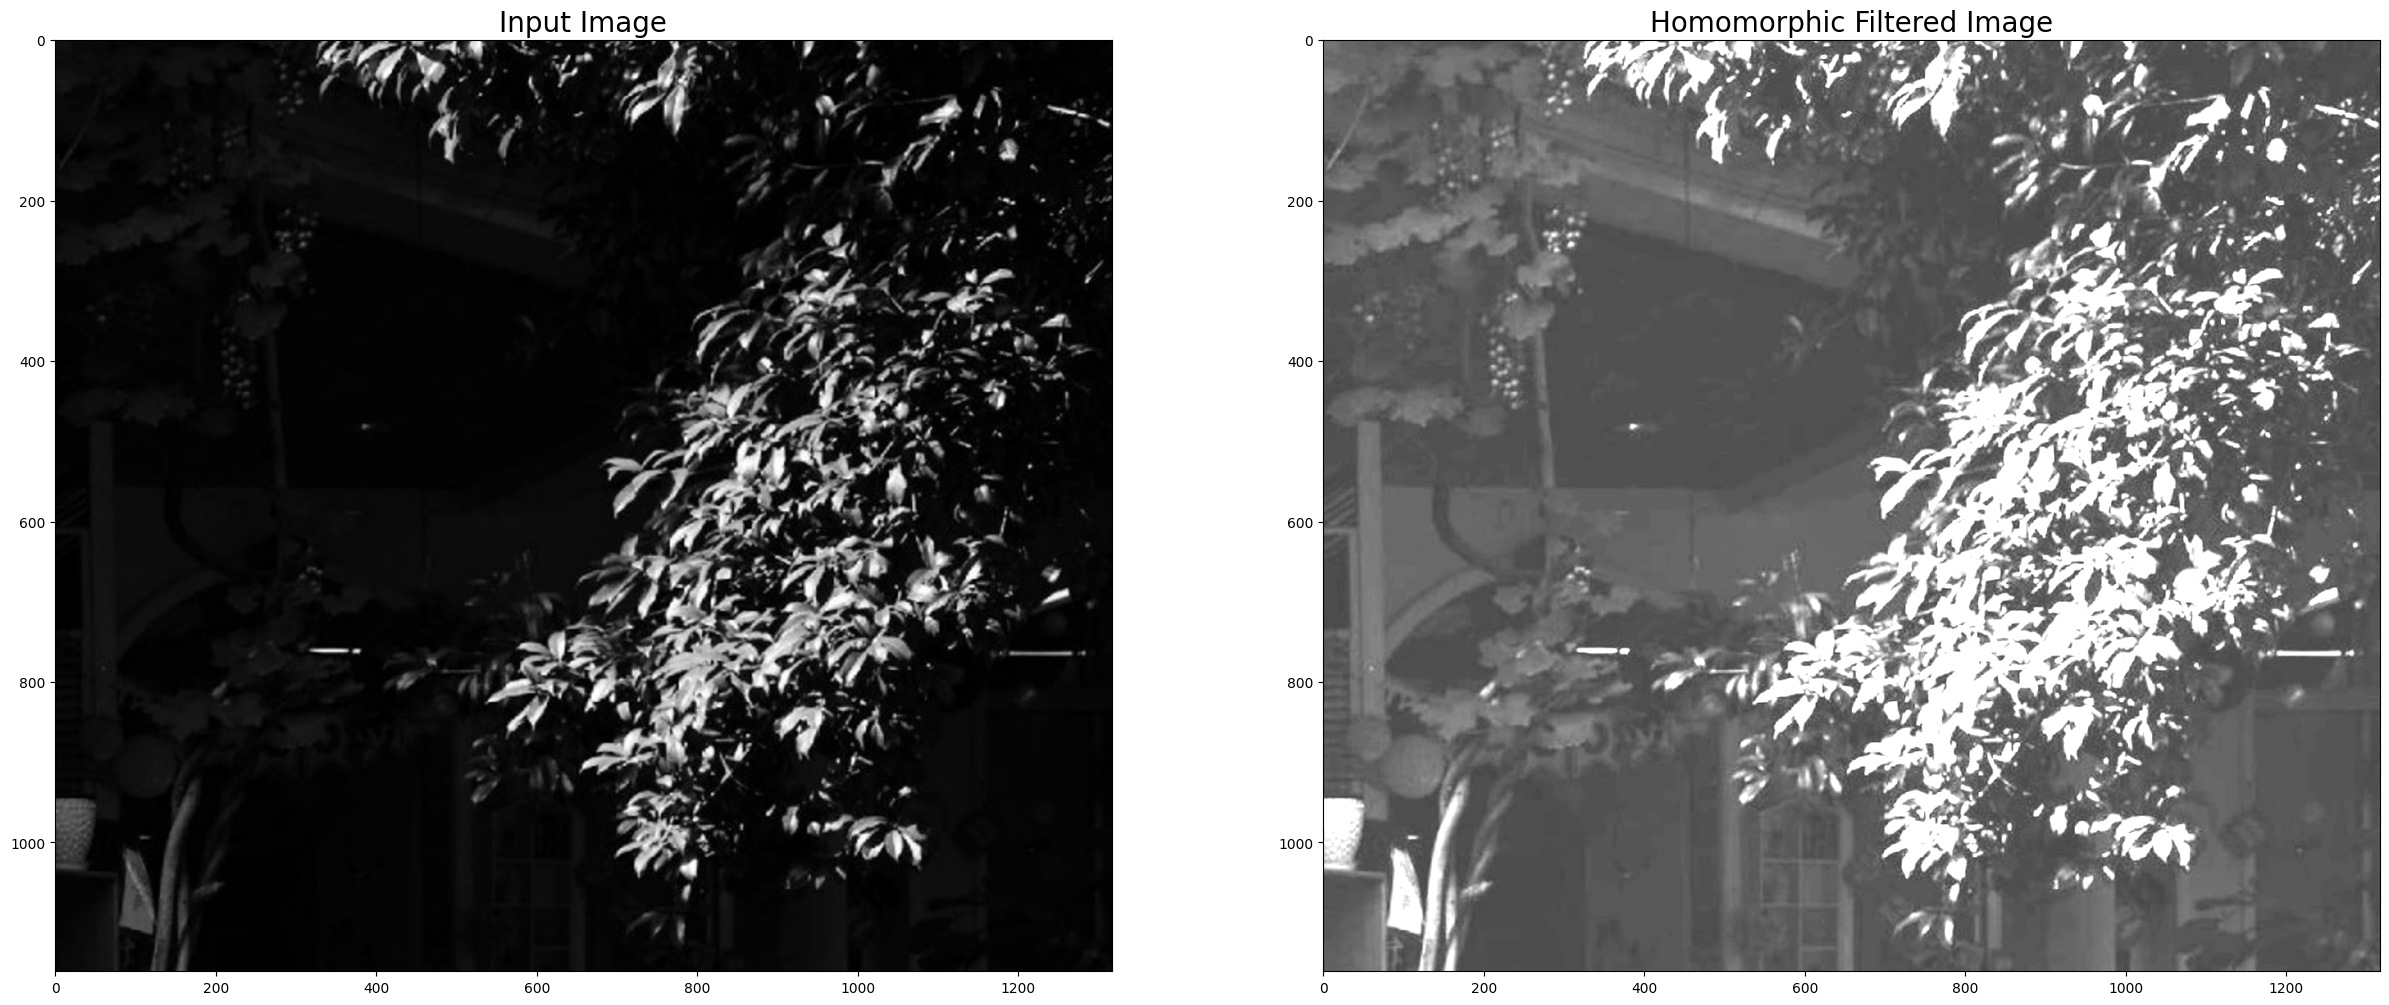

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(30, 30))
# 设置字体
font = fm.FontProperties(size=20)
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Input Image', fontproperties=font)
axs[1].imshow(filtered, cmap='gray')
axs[1].set_title('Homomorphic Filtered Image', fontproperties=font)
plt.show()